In [7]:
import json
import numpy as np

from typing import List
import matplotlib.pyplot as plt
from collections import Counter
from utils.data import NERDataset, read_data
from sklearn.metrics import classification_report, f1_score

In [2]:
pred = json.load(open("./NER/prediction/test_prediction.json"))

In [3]:
test, _ = read_data("./data/eng.testa")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 55045/55045 [00:00<00:00, 1201043.88it/s]


In [4]:
def count_metrics(gold_labels_per_sentence: List[List[str]], predict_labels_per_sentence: List[List[str]]):
    gold_labels = [l for l_per_sent in gold_labels_per_sentence for l in l_per_sent]
    predict_labels = [l for l_per_sent in predict_labels_per_sentence for l in l_per_sent]
    print(classification_report(gold_labels, predict_labels))
def get_label_distribution(labels: List[List[str]]):
    labels = [label for labels_per_sent in labels for label in labels_per_sent]
    return Counter(labels)

Можно заметить прямую корреляцию между распределением классов и итоговым качеством

In [5]:
test_distribution = get_label_distribution(test["labels_per_sent"])

Test distribution


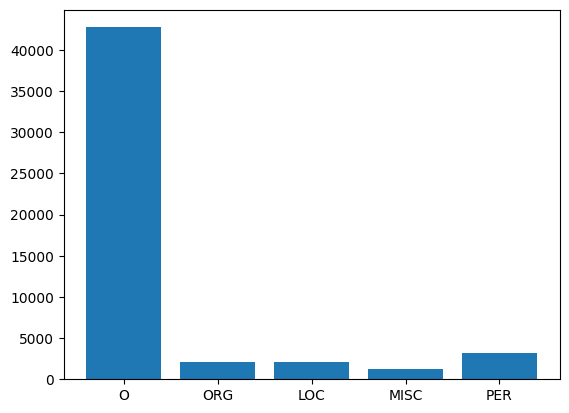

In [6]:
def visualize_distr(data: Counter):
    labels = list(data.keys())
    plt.bar(x=labels, height=list(data.values()))
    plt.show()

print("Test distribution")
visualize_distr(test_distribution)

In [39]:
count_metrics(test["labels_per_sent"], pred)

              precision    recall  f1-score   support

         LOC       0.97      0.98      0.98      2094
        MISC       0.92      0.93      0.92      1268
           O       1.00      1.00      1.00     42759
         ORG       0.97      0.94      0.95      2092
         PER       0.99      0.99      0.99      3149

    accuracy                           0.99     51362
   macro avg       0.97      0.97      0.97     51362
weighted avg       0.99      0.99      0.99     51362



Модель, в большинстве случаев, совершает ошибки на спорных сущностях таких как год отнести к MISC, к какому-то событию или же the', 'Test', 'and', 'County', 'Cricket', 'Board', Test не была размечина как часть сущности, что спорно. Также, встречаются сущности не встречающиеся в обучаемой выборке и сущность которых не возможно определить по контектсту однозначно. Также апострафы('s и тд) в обучающей выбрке иногда размечаются как сущность, а иногда нет, что тоже приводит к ошибкам.

In [11]:
for i in range(len(pred)):
    for j in range(len(pred[i])):
        if pred[i][j] != test["labels_per_sent"][i][j]:
            print(pred[i])
            print(test["labels_per_sent"][i])
            print(test["sentences"][i])
            print("###############################################")
            break

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'PER', 'O', 'MISC', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O']
['They', 'were', 'held', 'up', 'by', 'a', 'gritty', '84', 'from', 'Paul', 'Johnson', 'but', 'ex-England', 'fast', 'bowler', 'Martin', 'McCague', 'took', 'four', 'for', '55', '.']
###############################################
['O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'MISC', 'O', 'O']
['CRICKET', '-', '1997', 'ASHES', 'INTINERARY', '.']
###############################################
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'ORG', 'ORG', 'ORG']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'ORG', 'ORG', 'ORG', 'ORG']
['starting', 'on', 'May', '13', 'next', 'year', ',', 'the', 'Test', 'and', 'County', 'Cricket', 'Board']
###############################################
['MISC', 'O', 'O', 'O', 'O', 'O', 'MISC', 'O', 'O']
['MISC', 'O